In [125]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
data=load_breast_cancer()


In [5]:
x=data.data
y=data.target

In [7]:
data=load_breast_cancer()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [99]:
pd.set_option('display.max_columns', None)  

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [119]:
pd.set_option('display.max_columns', None) 
df.iloc[200:, :31].head()  # Displays the first 5 rows and first 50 columns

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
200,12.23,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.06013,0.3534,1.3260,2.308,27.24,0.007514,0.01779,0.01401,0.01140,0.01503,0.003338,14.44,28.36,92.15,638.4,0.1429,0.2042,0.1377,0.1080,0.2668,0.08174,1
201,17.54,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.1506,0.05491,0.3971,0.8282,3.088,40.73,0.006090,0.02569,0.02713,0.01345,0.01594,0.002658,20.42,25.84,139.50,1239.0,0.1381,0.3420,0.3508,0.1939,0.2928,0.07867,0
202,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.00,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762,0
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,0.5648,1.9300,3.909,52.72,0.008824,0.03108,0.03112,0.01291,0.01998,0.004506,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.4646,0.2013,0.4432,0.10860,0
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,0.3961,1.0440,2.497,30.29,0.006953,0.01911,0.02701,0.01037,0.01782,0.003586,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.08750,1


In [47]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)  # Features (all columns except 'target')
y = df['target']  # Target variable

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
model.fit(X_train_resampled, y_train_resampled)

In [137]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nb_model = GaussianNB()
nb_model=model.fit(X_train_resampled, y_train_resampled)
y_pred_nb = model.predict(X_test) 
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9649122807017544
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Naive Bayes Confusion Matrix:
 [[40  3]
 [ 1 70]]


In [141]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Create and train the model
model = GaussianNB()  # Replace with your desired model
model.fit(X_train_resampled, y_train_resampled)

# 4. Evaluate the model on the original test data
y_pred = model.predict(X_test)

# 5. Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 6. Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9736842105263158
Confusion Matrix:
 [[40  3]
 [ 0 71]]


In [143]:
import numpy as np

   # Assuming you have a trained GaussianNB model called 'nb_model'
   # and your features are in a DataFrame called 'X'



feature_means = model.theta_  # Get means of features for each class
feature_vars = model.var_  # Get variances of features for each class
feature_stds = np.sqrt(feature_vars)  # Calculate standard deviations

# ... (rest of the code remains the same) ...

   # Calculate differences in means between classes
mean_diff = np.abs(feature_means[0] - feature_means[1]) 

   # Calculate ratios of standard deviations between classes
std_ratio = feature_stds[0] / feature_stds[1] 

   # Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({
       'Feature': X.columns,
       'Mean Difference': mean_diff,
       'Std Ratio': std_ratio
   })

   # Sort by importance (e.g., by mean difference)
feature_importance_df = feature_importance_df.sort_values(by=['Mean Difference'], ascending=False)

print(feature_importance_df)

                    Feature  Mean Difference  Std Ratio
23               worst area       839.132652   3.392392
3                 mean area       511.299651   2.605571
22          worst perimeter        53.340592   2.045601
13               area error        48.162006   6.255670
2            mean perimeter        36.975383   1.791502
20             worst radius         7.600801   2.038623
21            worst texture         5.419822   0.887260
0               mean radius         5.282355   1.751394
1              mean texture         3.405851   0.904930
12          perimeter error         2.166782   3.103847
10             radius error         0.303507   2.856708
26          worst concavity         0.277759   1.126522
25        worst compactness         0.182480   1.621850
6            mean concavity         0.110257   1.445513
27     worst concave points         0.104147   1.179297
5          mean compactness         0.062289   1.332370
7       mean concave points         0.060362   1

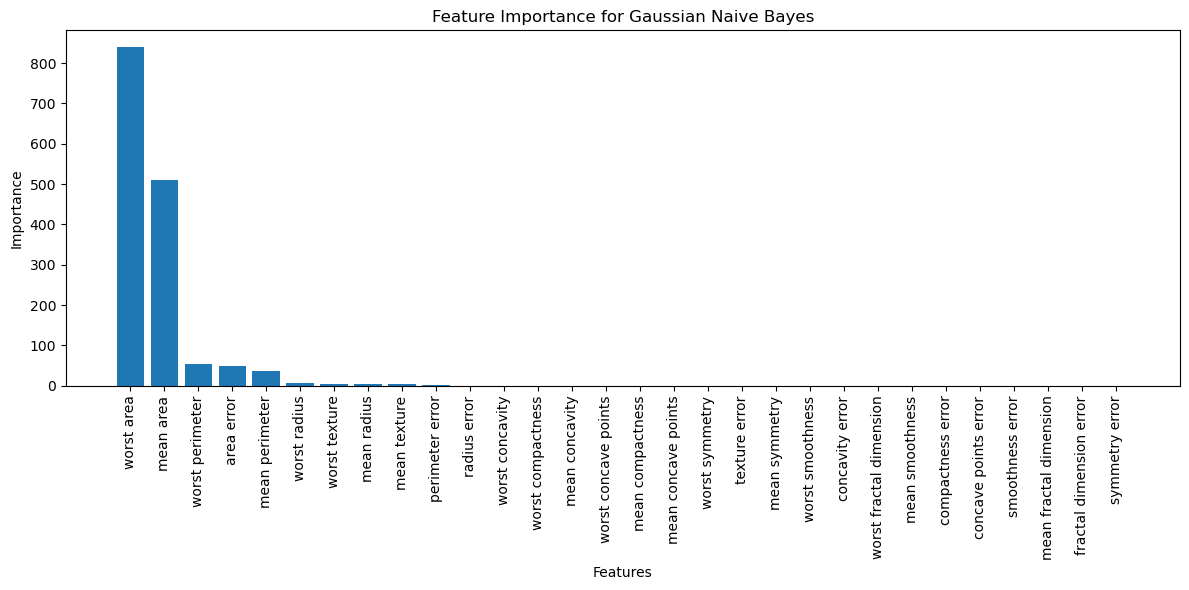

In [145]:
feature_importance_df = feature_importance_df.rename(columns={'Mean Difference': 'Importance'}) 
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Feature Importance for Gaussian Naive Bayes')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [147]:
# Select top k features based on importance
k =10  # Number of top features to select
selected_features = feature_importance_df['Feature'][:k].tolist()

# Create a new DataFrame with selected features
X_selected = X[selected_features]
X_train = pd.DataFrame(X_train, columns=X.columns)  # Convert X_train to DataFrame
X_test = pd.DataFrame(X_test, columns=X.columns) 

In [175]:
X_train_selected = X_train.loc[:, selected_features]  # Select features from training set
X_test_selected = X_test.loc[:, selected_features]    # Select features from testing set
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
X_train = scaler.fit_transform(X_train_selected)
X_test = scaler.transform(X_test_selected)
# Create and train the model
model = GaussianNB()
model.fit(X_train_selected, y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [151]:
from sklearn.metrics import accuracy_score,confusion_matrix  # Or other relevant metrics

# Predict on the test set
y_pred = model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"GaussianNB: Accuracy with selected of features: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()

GaussianNB: Accuracy with selected of features: 0.956140350877193
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114




In [153]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] # Example values
    # Add 'priors' if you want to specify prior probabilities
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5) 
grid_search.fit(X_train_selected, y_train)

# Get best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

In [155]:
y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy of the best model: 0.956140350877193
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

[[38  5]
 [ 0 71]]


In [157]:
import joblib
joblib.dump(best_model, 'bcc.joblib')
joblib.dump(scaler, "scaler.pkl")
joblib.dump(selected_features,"selectedf.pkl")

['selectedf.pkl']

In [173]:
# Assuming 'selected_features' is a list of your selected feature names
# and 'target_column' is the name of your target column
target_column = 'target'
# Create a list of all columns to display
columns_to_display = selected_features + [target_column]  

# Display the first 5 rows with the selected features and target column
df.iloc[200:, :31][columns_to_display].head()

,worst area,mean area,worst perimeter,area error,mean perimeter,worst radius,worst texture,mean radius,mean texture,perimeter error,target
200,638.4,461.0,92.15,27.24,78.54,14.44,28.36,12.23,19.56,2.308,1
201,1239.0,951.6,139.50,40.73,115.10,20.42,25.84,17.54,19.32,3.088,0
202,1986.0,1685.0,177.00,83.16,158.90,25.12,32.68,23.29,26.67,4.667,0
203,1153.0,597.8,128.50,52.72,91.56,19.20,41.85,13.81,23.75,3.909,0
204,677.9,481.9,96.05,30.29,81.09,14.97,24.64,12.47,18.60,2.497,1


In [179]:
# Create a DataFrame with the given values and feature names
input_data = pd.DataFrame([[638.4,461.0,92.15,27.24,78.54,14.44,28.36,12.23,19.56,2.308]],
                          columns=['worst area', 'mean area', 'worst perimeter', 'area error', 'mean perimeter', 'worst radius', 'worst texture', 'mean radius', 'mean texture', 'perimeter error'])

# Select only the features used during training
input_data_selected = input_data[selected_features]

# Make the prediction
prediction = model.predict(input_data_selected)[0]

# Interpret the prediction
diagnosis = "Malignant" if prediction == 0 else "Benign"

print("Diagnosis:", diagnosis)

Diagnosis: Benign
